Running rmagic by executing following command: this will run R code in Colab notebooks by starting the cell with %%R

In [3]:
%load_ext rpy2.ipython

# Linear regression: Predicting Video Game ratings

The video game market is one of the fiercest out there. Out of thousands of video games, only a few thrive. The likelihood of making a profitable video game is even tinier. In order to boost the game’s popularity and success, it is necessary to have good ratings.
To understand what drives a video game’s ratings. These data were gathered from different video game websites. We will apply linear regression to this dataset, to build a model that helps us predict each video game’s rating. In this dataset, we have the following variables:


**Output/Outcome variable:**

score: (From 1 to 100) The score given to the game  by professional critics

**Input/Independent variables:**

Identity variables:

title: The video game’s name

Numeric variables:


* release_year: The year the video game was released
* sales_na: Sales in North America (in millions)
* sales_eu: Sales in Europe (in millions)
* sales_jp: Sales in Japan (in millions)
* sales_others: Sales in the rest of the world (in millions)
* sales_global: Sales globally (in millions)
* count_critic: The number of critics that have rated the game

Categorical variables:
* platform: The video game’s platform (WII, PlayStation, Nintendo DS, XBox360, etc.)
* genre: The video game genre (sports, role-playing, puzzle, shooter, simulation, etc.)
* publisher: The video game’s publisher company (Nintendo, Sega, Ubisoft, etc)
* developer: The company that developed the game
* content_rating: The maturity level of the game






Importing the dataset, attaching it and view its columns

In [8]:
%%R
video_games=read.csv("/content/drive/MyDrive/Colab Notebooks/video_games.csv")

attach(video_games)

names(video_games)

 [1] "title"          "platform"       "release_year"   "genre"         
 [5] "publisher"      "sales_na"       "sales_eu"       "sales_jp"      
 [9] "sales_others"   "sales_global"   "score"          "count_critic"  
[13] "developer"      "content_rating"




---


## Visualizing variables

---


Summary of the score column

In [14]:
%%R
summary(video_games$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   13.0    62.0    72.0    70.3    81.0    98.0 


Creating a Box Plot of scores in blue colour. To see min, max, 1st quartile, 2nd quartile, median and outliers in the data

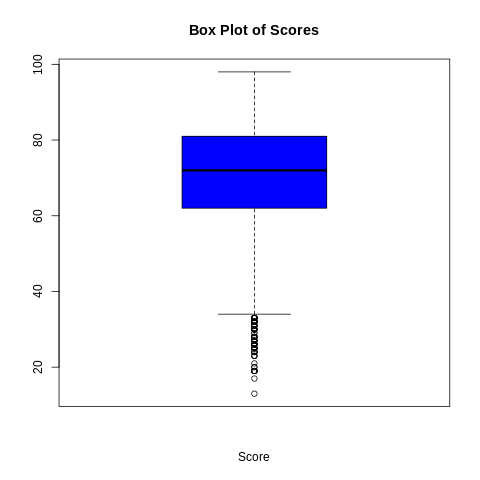

In [16]:
%%R
boxplot(video_games$score, col = "blue", main = "Box Plot of Scores", xlab = "Score")

Creating a histogram having 20 breaks in blue colour. It shows the distribution of scores quite clearly

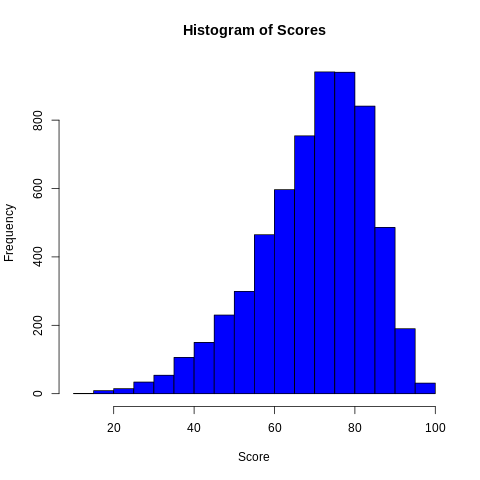

In [17]:
%%R
hist(video_games$score, breaks = 20, col = "blue", main = "Histogram of Scores", xlab = "Score")

# Getting summary of global sales column in the dataset

In [18]:
%%R
summary(video_games$sales_global)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.1100  0.3000  0.7639  0.7600 35.5200 


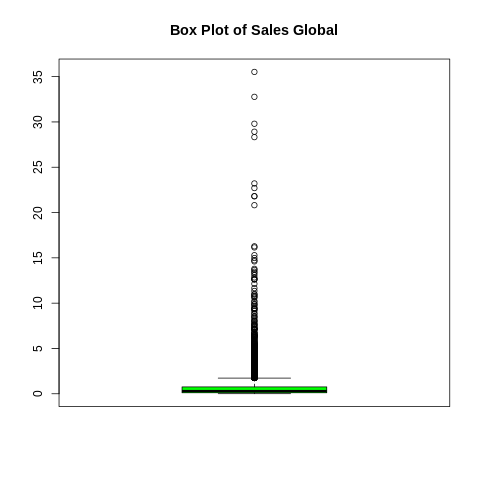

In [19]:
%%R
boxplot(video_games$sales_global, col = "green", main = "Box Plot of Sales Global")

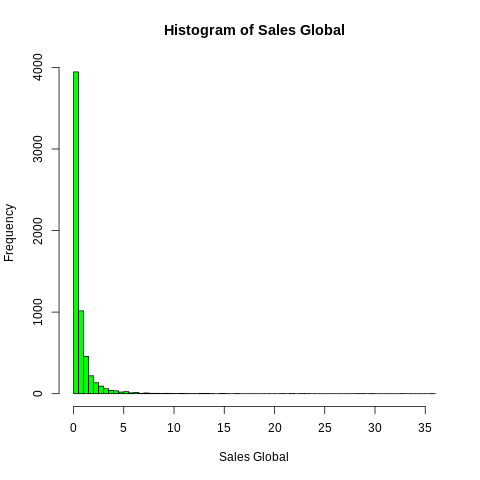

In [21]:
%%R
hist(video_games$sales_global, breaks = 100, col = "green", main = "Histogram of Sales Global", xlab = "Sales Global")

# Analyzing release year

In [22]:
%%R
summary(video_games$release_year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1985    2004    2007    2007    2011    2016 


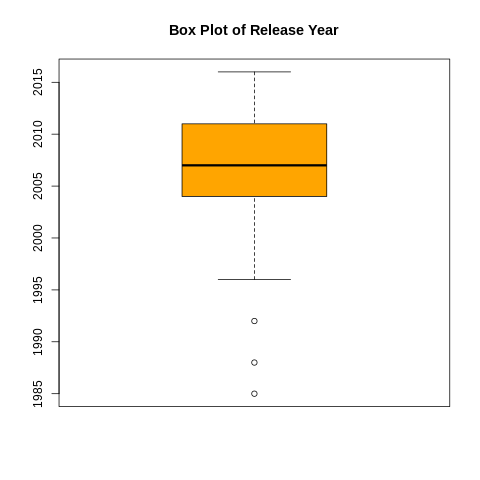

In [23]:
%%R
boxplot(video_games$release_year, col = "orange", main = "Box Plot of Release Year")

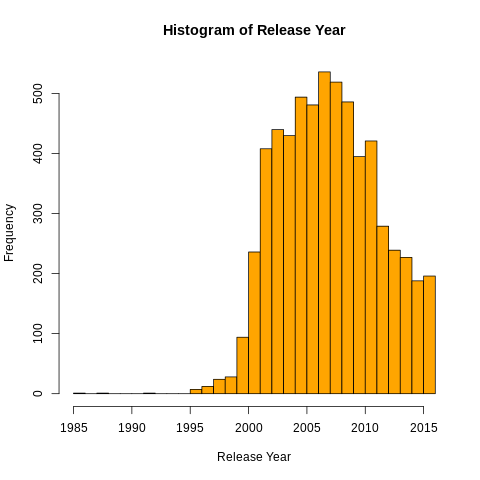

In [24]:
%%R
hist(video_games$release_year, breaks = 25, col = "orange", main = "Histogram of Release Year", xlab = "Release Year")

# Count Critic

In [26]:
%%R
summary(video_games$count_critic)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   14.00   25.00   29.09   40.00  113.00 


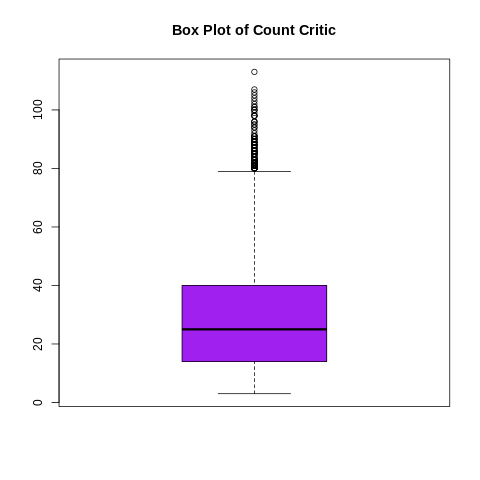

In [27]:
%%R
boxplot(video_games$count_critic, col = "purple", main = "Box Plot of Count Critic")

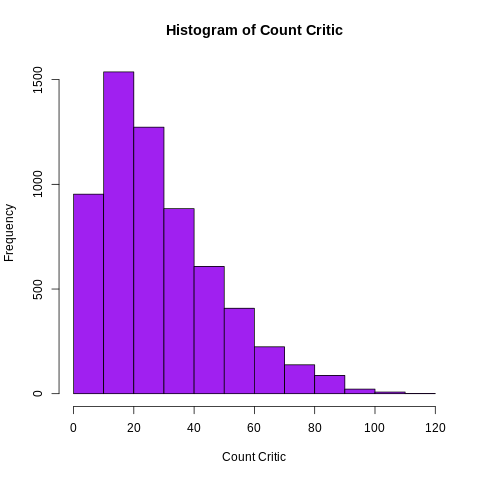

In [30]:
%%R
hist(video_games$count_critic, breaks = 10, col = "purple", main = "Histogram of Count Critic", xlab = "Count Critic")

# Scatter plots

Each scatter plot have the response variable (score) on the y-axis, and each respective predictor (sales_global, release_year, count_critic) on the x-axis.  

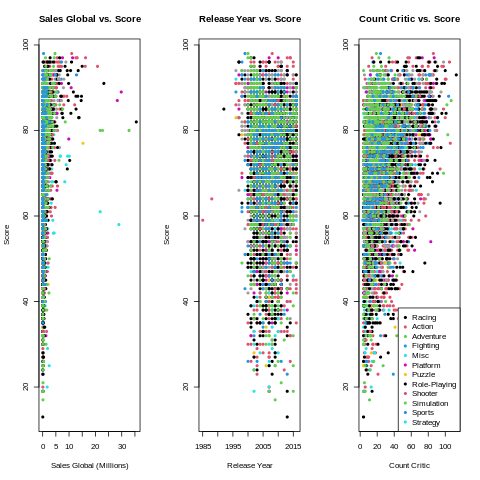

In [32]:
%%R
par(mfrow = c(1, 3))
# Convert the "genre" column to a numeric factor with unique colors
video_games$genre_factor <- as.numeric(factor(video_games$genre))

# Scatter plot 1: Sales Global vs. Score
plot(video_games$sales_global, video_games$score, main = "Sales Global vs. Score", xlab = "Sales Global (Millions)", ylab = "Score", col = video_games$genre_factor, pch = 20)

# Scatter plot 2: Release Year vs. Score
plot(video_games$release_year, video_games$score, main = "Release Year vs. Score", xlab = "Release Year", ylab = "Score", col = video_games$genre_factor, pch = 20)

# Scatter plot 3: Count Critic vs. Score
plot(video_games$count_critic, video_games$score, main = "Count Critic vs. Score", xlab = "Count Critic", ylab = "Score", col = video_games$genre_factor, pch = 20)

# Reset the layout to its default
legend("bottomright", legend = levels(factor(video_games$genre)), col = 1:7, pch = 20)
par(mfrow = c(1, 1))



---
# Simple linear regression


---
$$
score  = b_o+ b_1 \times \text{(sales_global)}
$$

In [47]:
%%R
# Fit a linear regression model
regression_model_sales <- lm(score ~ sales_global, data = video_games)

# Get the regression coefficients
bo_sales <- coef(regression_model_sales)[1]
b1_sales <- coef(regression_model_sales)[2]

# Get the summary of the regression model
summary_regression_sales <- summary(regression_model_sales)

# Extract R-squared
r_squared_sales <- summary_regression_sales$r.squared

# Extract the 95% confidence interval for b1
conf_interval_b1_sales <- confint(regression_model_sales)[2, ]

# Extract the t-test statistic for b1
t_test_statistic_sales <- summary_regression_sales$coefficients[2, "t value"]

# Calculate the probability that there is not a statistically significant relationship
# This is the p-value associated with the t-test for b1
p_value_sales <- summary_regression_sales$coefficients[2, "Pr(>|t|)"]

# Print the results
cat("bo:", bo_sales, "\n")
cat("b1:", b1_sales, "\n\n")
cat("R-squared:", r_squared_sales, "\n")
cat("95% Confidence interval for b1:", conf_interval_b1_sales, "\n")
cat("t-test statistic for b1:", t_test_statistic_sales, "\n")
cat("probability that there is not a statistically significant relationship between these two variables:", p_value_sales, "\n")


bo: 68.61676 
b1: 2.201481 

R-squared: 0.07174179 
95% Confidence interval for b1: 2.003385 2.399578 
t-test statistic for b1: 21.78569 
probability that there is not a statistically significant relationship between these two variables: 2.023292e-101 


Summary of regression Model:

In [39]:
%%R
summary(regression_model_sales)


Call:
lm(formula = score ~ sales_global, data = video_games)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.284  -7.771   2.292   9.926  28.635 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   68.6168     0.1876  365.75   <2e-16 ***
sales_global   2.2015     0.1011   21.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 6141 degrees of freedom
Multiple R-squared:  0.07174,	Adjusted R-squared:  0.07159 
F-statistic: 474.6 on 1 and 6141 DF,  p-value: < 2.2e-16



# Regression graph showing the line of best fit, the 95% confidence intervals, and the variable’s scatterplot

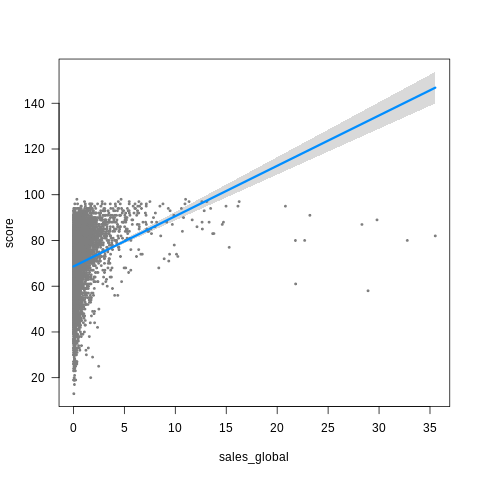

In [43]:
%%R
library(visreg)
visreg(regression_model_sales, scale = "linear", alpha = 0.05)  # 95% confidence interval


# Score vs Release Year
$$
score  = b_o+ b_1 \times \text{(release_year)}
$$

In [44]:
%%R
model_release_year <- lm(score ~ release_year, data = video_games)
summary(model_release_year)


Call:
lm(formula = score ~ release_year, data = video_games)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.118  -8.313   1.947  10.492  27.720 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  135.45636   84.30817   1.607    0.108
release_year  -0.03246    0.04200  -0.773    0.440

Residual standard error: 13.91 on 6141 degrees of freedom
Multiple R-squared:  9.726e-05,	Adjusted R-squared:  -6.557e-05 
F-statistic: 0.5973 on 1 and 6141 DF,  p-value: 0.4396



In [46]:
%%R
# Extract regression coefficients
bo <- coef(model_release_year)[1]
b1 <- coef(model_release_year)[2]

# Calculate R-squared
r_squared <- summary(model_release_year)$r.squared

# Calculate 95% confidence interval for b1
conf_int <- confint(model_release_year)[2, ]

# Calculate t-test statistic
t_statistic <- summary(model_release_year)$coefficients[2, "t value"]

# Calculate the probability of no statistically significant relationship
p_value_release_year <- summary(model_release_year)$coefficients[2, "Pr(>|t|)"]

# Print the results
cat("bo:", bo, "\n")
cat("b1:", b1, "\n")
cat("R-squared:", r_squared, "\n")
cat("95% Confidence interval for b1:", conf_int, "\n")
cat("t-test statistic for b1:", t_statistic, "\n")
cat("Probability of no statistically significant relationship:", p_value_release_year, "\n")


bo: 135.4564 
b1: -0.03245812 
R-squared: 9.725551e-05 
95% Confidence interval for b1: -0.1147883 0.0498721 
t-test statistic for b1: -0.7728546 
Probability of no statistically significant relationship: 0.4396382 


# Creating Regression Plot:

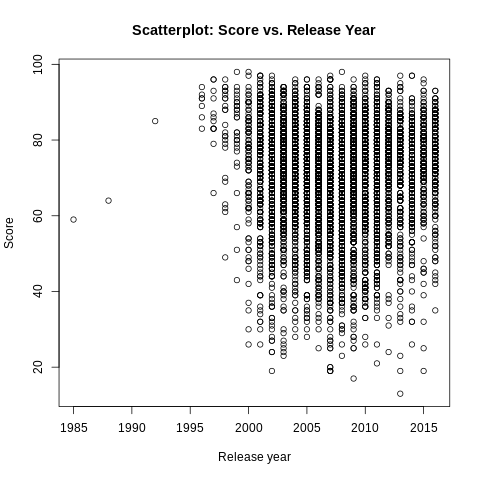

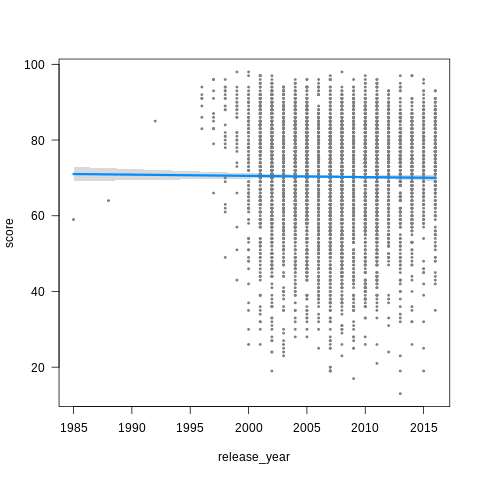

In [60]:
%%R
plot(release_year,score, xlab = "Release year", ylab = "Score", main = "Scatterplot: Score vs. Release Year")

visreg(model_release_year, scale = "linear", alpha = 0.05)  # 95% confidence interval

#   Score vs Count Critics

$$
score  = b_o+ b_1 \times \text{(count_critic)}
$$

In [53]:
%%R
# Perform a simple linear regression
model_count_critic <- lm(score ~ count_critic, data = video_games)

summary(model_count_critic)


Call:
lm(formula = score ~ count_critic, data = video_games)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.140  -7.186   1.565   8.856  31.030 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.954394   0.295309  209.79   <2e-16 ***
count_critic  0.286812   0.008467   33.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.77 on 6141 degrees of freedom
Multiple R-squared:  0.1574,	Adjusted R-squared:  0.1573 
F-statistic:  1148 on 1 and 6141 DF,  p-value: < 2.2e-16



In [55]:
%%R
# Extract regression coefficients
bo <- coef(model_count_critic)[1]
b1 <- coef(model_count_critic)[2]

# Calculate R-squared
r_squared <- summary(model_count_critic)$r.squared

# Calculate 95% confidence interval for b1
conf_int <- confint(model_count_critic)[2, ]

# Calculate t-test statistic
t_statistic <- summary(model_count_critic)$coefficients[2, "t value"]

# Calculate the probability of no statistically significant relationship
p_value_count_critic <- summary(model_count_critic)$coefficients[2, "Pr(>|t|)"]

# Print the results
cat("bo:", bo, "\n")
cat("b1:", b1, "\n")
cat("R-squared:", r_squared, "\n")
cat("95% Confidence interval for b1:", conf_int, "\n")
cat("t-test statistic for b1:", t_statistic, "\n")
cat("Probability of no statistically significant relationship:", p_value_count_critic, "\n")


bo: 61.95439 
b1: 0.2868119 
R-squared: 0.1574493 
95% Confidence interval for b1: 0.2702145 0.3034092 
t-test statistic for b1: 33.87599 
Probability of no statistically significant relationship: 8.942652e-231 


# Plotting the regression line on scatter plot

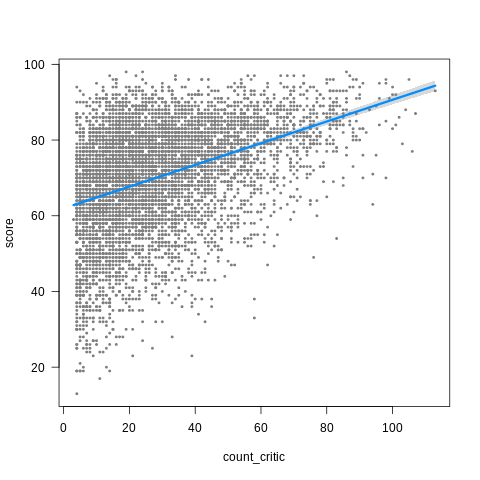

In [59]:
%%R
visreg(model_count_critic, scale = "linear", alpha = 0.05)  # 95% confidence interval

#Inferences that can be made from the models:

**Sales Global vs. Score:**
* The linear regression model indicates that there is a statistically significant relationship between a video game's global sales and its score, with a positive coefficient of 2.201481.
* This suggests that, on average, for each unit increase in global sales (measured in millions), the video game's score increases by approximately 2.2 units.
* The R-squared value of 0.07174179 indicates that global sales alone explains about 7.17% of the variation in the video game's score.
* This relationship is highly statistically significant (p-value ≈ 0), indicating strong evidence that it is not due to random chance. The 95% confidence interval for the coefficient b1 is [2.003385, 2.399578], suggesting that we can be 95% confident that the true value of b1 falls within this range.

**Release Year vs. Score:**
* In contrast, the regression model for release year vs. score shows a very weak relationship, with a coefficient of -0.03245812.
* This implies that, on average, for each year increase in release year, the video game's score decreases by approximately 0.0325 units.
* The R-squared value of 9.725551e-05 indicates that release year explains an extremely small proportion of the variation in the video game's score, suggesting that it is not a meaningful predictor.
* The confidence interval for b1 includes zero [-0.1147883, -0.0498721], and the p-value (0.4396382) suggests that there is no statistically significant relationship between release year and score.
* This variable does not appear to be a significant factor affecting the score of video games.


**Count Critic vs. Score:**
* The regression model for count critic vs. score indicates a strong relationship between the number of critics and the video game's score, with a positive coefficient of 0.2868119.
* This suggests that, on average, for each additional critic review, the video game's score increases by approximately 0.287 units.
* The R-squared value of 0.1574493 indicates that the count of critic reviews explains about 15.74% of the variation in the video game's score.
* The 95% confidence interval for b1 is [0.2702145, 0.3034092], and the p-value (close to zero) confirms the statistical significance of this relationship.
* It appears that the number of critic reviews has a significant positive impact on the video game's score.


# Predictions

In [62]:
%%R

bo_sales <- coef(regression_model_sales)[1]
b1_sales <- coef(regression_model_sales)[2]

sales_global_new <- .75

# Calculate the predicted score
predicted_score <- bo_sales + b1_sales * sales_global_new

cat("Predicted Score for 750,000 Sales Global:", predicted_score, "\n")

Predicted Score for 750,000 Sales Global: 70.26787 


In [63]:
%%R
# Coefficients for the release_year regression
bo_release_year <- coef(model_release_year)[1]
b1_release_year <- coef(model_release_year)[2]

# Release year for prediction
release_year_new <- 2009

# Calculate the predicted score
predicted_score_release_year <- bo_release_year + b1_release_year * release_year_new

cat("Predicted Score for a Video Game Released in 2009:", predicted_score_release_year, "\n")


Predicted Score for a Video Game Released in 2009: 70.24801 


In [65]:
%%R
# Coefficients for the count_critic regression
bo_count_critic <- coef(model_count_critic)[1]
b1_count_critic <- coef(model_count_critic)[2]

# Number of critics for prediction
count_critic_new <- 80

# Calculate the predicted score
predicted_score_count_critic <- bo_count_critic + b1_count_critic * count_critic_new

cat("Predicted Score for a Video Game Reviewed by 80 Critics:", predicted_score_count_critic, "\n")


Predicted Score for a Video Game Reviewed by 80 Critics: 84.89934 


# Multiple Linear Regression

score = bo+ b1(sales_global) + b2(release_year) + b3(count_critic)

#Why

* We cannot make a joint prediction about the response variable
* Simple regressions don’t take into account interaction between predictors



In [66]:
%%R
mreg=lm(score~sales_global + release_year + count_critic)
summary(mreg)



Call:
lm(formula = score ~ sales_global + release_year + count_critic)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.560  -7.052   1.651   8.817  32.261 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  629.472837  77.822324   8.089 7.21e-16 ***
sales_global   1.232606   0.100236  12.297  < 2e-16 ***
release_year  -0.282851   0.038792  -7.291 3.45e-13 ***
count_critic   0.264386   0.009005  29.359  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.55 on 6139 degrees of freedom
Multiple R-squared:  0.1862,	Adjusted R-squared:  0.1858 
F-statistic: 468.1 on 3 and 6139 DF,  p-value: < 2.2e-16



In above output we see that all of the coefficients i.e b0, b1, b2, and b3 in the model are statistically significant at the 1% level because their p-values are much between 0 and 0.001 (0.1%).

# Interpretation:

* For every unit increase in global sales, game scores tend to increase by 1.23 points.
* Older games tend to have lower scores, with release year is decreases by 1 then score decreases by 0.28 points and for each additional critic review, game scores rise by 0.26 points.
* Global sales, critic review count and release year are very significant in predicting the game score.
* The model explains about 18.62% of the variation in game scores, So there should be other variables as well which are affecting the game score.


# Prediction of a movie with 750000 in sales, 2009 release year and critic count of 80

In [67]:
%%R
new_df <- data.frame(sales_global = 0.75, release_year = 2009, count_critic = 80)
score4 <- predict(mreg, new_df)
score4

       1 
83.30009 


# Working with Categorical columns

score = bo+ b1(release_year) + b2(Nintendo)

In [70]:
%%R
video_games$Nintendo <- ifelse(video_games$publisher == "Nintendo", 1, 0)

mreg=lm(score~release_year+Nintendo)

b0 = coef(mreg)[1]
b1 = coef(mreg)[2]
b2 = coef(mreg)[3]
cat("b0 =", b0)
cat("\nb1 =", b1)
cat("\nb2 =", b2)

b0 = 147.6327
b1 = -0.0386584
b2 = 6.290655

# Interepretation of b2
 When a video game is linked to the "Nintendo" brand, its score increase by 6.29 points compared to Non- Nintendo games, given both released in the same year. In simpler terms, games related to Nintendo tend to perform better in terms of scores compared to those that are not.


# Plotting Regression Line

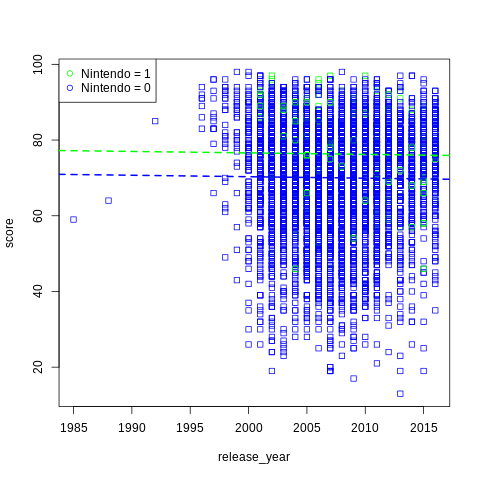

In [71]:
%%R
plot(release_year, score , col=ifelse(Nintendo=="1", "green", "blue"), pch = 0)

abline(b0+b2,b1, col = "green" , lwd = 2, lty = 2)
abline(b0,b1, col = "blue" , lwd = 2, lty = 2)

legend("topleft", pch=1, col=c( "green", "blue" ), c( "Nintendo = 1", "Nintendo = 0"))


Genres

In [79]:
%%R
cat("number of Genre:",length(unique(video_games$genre)),"\n")
table(genre)

number of Genre: 12 
genre
      Racing       Action    Adventure     Fighting         Misc     Platform 
         526         1464          224          339          347          346 
      Puzzle Role-Playing      Shooter   Simulation       Sports     Strategy 
         109          642          797          263          848          238 


In [83]:
%%R
video_games$genre=relevel(as.factor(video_games$genre), ref = "Racing")

mreg2=lm(score~genre)
summary(mreg2)


Call:
lm(formula = score ~ genre)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.589  -7.976   2.167  10.048  30.264 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.5894     0.5979 116.395  < 2e-16 ***
genreAction        -1.8537     0.6971  -2.659  0.00785 ** 
genreAdventure     -3.4063     1.0940  -3.114  0.00186 ** 
genreFighting       0.5316     0.9550   0.557  0.57781    
genreMisc          -2.0850     0.9483  -2.199  0.02794 *  
genrePlatform       0.7517     0.9491   0.792  0.42841    
genrePuzzle         1.5207     1.4431   1.054  0.29200    
genreRole-Playing   3.2440     0.8064   4.023 5.82e-05 ***
genreShooter        1.3630     0.7703   1.769  0.07688 .  
genreSimulation     0.3384     1.0355   0.327  0.74384    
genreSports         4.5769     0.7610   6.014 1.91e-09 ***
genreStrategy       3.4106     1.0712   3.184  0.00146 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard err

# Regression equation:
$$
score = 69.59 - 1.85*genreAction - 3.40*genreAdventure + 0.53*genreFighting - 2.08*genreMisc + 0.75*genrePlatform + 1.52*genrePuzzle + 3.24*genreRole-Playing + 1.36*genreShooter + 0.34*genreSimulation + 4.57*genreSports + 3.41*genreStrategy
$$

# Interpretation:
genreRole-Playing,
genreSports,
genreStrategy

These three genre has positive coefficients and p value less than 0.01 which tells that these genre games has higher scores at 1% significance level than racing games.


---



genreAction,
genreAdventure

These two genre has negative coefficients and p value less than 0.01 which tells that these genre games has lower scores at 1% significance level than racing games.



# Interaction Between Variables

$$
score = bo+ b1(Nintendo)+ b2(strategy)+b3(strategy*Nintendo)
$$

In [86]:
%%R
video_games$strategy <- ifelse(video_games$genre == "Strategy", 1, 0)

mreg3 = lm(score ~ strategy + Nintendo + Nintendo*strategy)
summary(mreg3)


Call:
lm(formula = score ~ strategy + Nintendo + Nintendo * strategy)

Residuals:
   Min     1Q Median     3Q    Max 
-56.93  -7.93   2.07  10.07  28.07 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.9305     0.1841 379.828  < 2e-16 ***
strategy            2.5497     0.9370   2.721  0.00652 ** 
Nintendo            6.0498     0.8895   6.802 1.13e-11 ***
strategy:Nintendo   5.1973     4.3649   1.191  0.23381    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.84 on 6139 degrees of freedom
Multiple R-squared:  0.0101,	Adjusted R-squared:  0.009614 
F-statistic: 20.87 on 3 and 6139 DF,  p-value: 1.888e-13



# Interpretation of b3

b3 is coefficient of interaction variable (nintendo*strategy). This tells us

b3 describes difference in slope of strategy games between a Nintendo and non-Nintendo games.
Also,
b3 describes difference in slope of Nintendo games between a strategy and non-strategy games.


# Plot: score = bo+ b1(release_year) + b2(Nintendo) + b3(release_year*Nintendo)



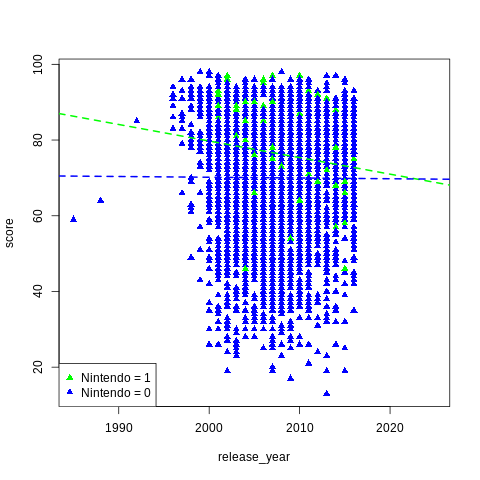

In [87]:
%%R
mreg4 = lm(score ~ release_year + Nintendo + Nintendo*release_year)

b0 = coef(mreg4)[1]
b1 = coef(mreg4)[2]
b2 = coef(mreg4)[3]
b3 = coef(mreg4)[4]

plot(release_year, score , col=ifelse(Nintendo=="1", "green", "blue"), pch = 17, xlim = c(1985, 2025))

abline(b0+b2,b1+b3, col = "green" , lwd = 2, lty = 2)
abline(b0,b1, col = "blue" , lwd = 2, lty = 2)
legend("bottomleft", pch=17, col=c( "green", "blue" ), c( "Nintendo = 1", "Nintendo = 0"))


# Interpretation
Quality of Nintendo games is in a downward trend. With every year the scores of their games are reducing while the scores of non-Nintendo games are almost stagnant over years.
